# Report - Movies

In [1]:
# Preparation for pandas and NumPy
import numpy as np
import pandas as pd
import heapq
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 500)

# Preparation for matplotlib
%matplotlib inline 

In [2]:
movies = pd.read_csv("movies.csv")

# 1.Objective of the Proposed Research: 

Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the movie industry, and get answers.

Steven Spielberg wants to produce a new movie for the summer, and hired you to help him understand the characteristics of the movies in the last 30 years, for an informed decision regarding the genre, director, etc.<br>

My objective is to help him find the most suitable genre, director, star, writer and rating, based on the score and profit.<br>
Finally, based on the trends of different genre, i will look for a proper genre that has the greatest potential business values and fitting the trends of genre.

# 2.Data Exploration:

## 1) Show structure and information of the dataset

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


### We have 6820 rows and 15 columns.

## 2) Show first 5 rows and last 5 rows of dataset

In [4]:
movies.head(5)

       budget                                 company country        director      genre        gross                      name rating    released  runtime  score               star   votes         writer  year
0   8000000.0           Columbia Pictures Corporation     USA      Rob Reiner  Adventure   52287414.0               Stand by Me      R  1986-08-22       89    8.1        Wil Wheaton  299174   Stephen King  1986
1   6000000.0                      Paramount Pictures     USA     John Hughes     Comedy   70136369.0  Ferris Bueller's Day Off  PG-13  1986-06-11      103    7.8  Matthew Broderick  264740    John Hughes  1986
2  15000000.0                      Paramount Pictures     USA      Tony Scott     Action  179800601.0                   Top Gun     PG  1986-05-16      110    6.9         Tom Cruise  236909       Jim Cash  1986
3  18500000.0  Twentieth Century Fox Film Corporation     USA   James Cameron     Action   85160248.0                    Aliens      R  1986-07-18      137 

In [5]:
movies.tail(5)

         budget                    company country         director      genre      gross                            name rating    released  runtime  score               star  votes             writer  year
6815        0.0   Fox Searchlight Pictures      UK  Mandie Fletcher     Comedy  4750497.0  Absolutely Fabulous: The Movie      R  2016-07-22       91    5.4  Jennifer Saunders   9161  Jennifer Saunders  2016
6816        0.0   Siempre Viva Productions     USA   Paul Duddridge      Drama    28368.0           Mothers and Daughters  PG-13  2016-05-06       90    4.9        Selma Blair   1959      Paige Cameron  2016
6817  3500000.0     Warner Bros. Animation     USA          Sam Liu  Animation  3775000.0        Batman: The Killing Joke      R  2016-07-25       76    6.5       Kevin Conroy  36333    Brian Azzarello  2016
6818        0.0        Borderline Presents     USA    Nicolas Pesce      Drama    25981.0           The Eyes of My Mother      R  2016-12-02       76    6.2     Kika Ma

### Looks like the year is 1986 - 2016

## 3) Let's take look at how many different genres in the dataset

In [6]:
dgenre = movies.groupby("genre")

In [7]:
dgenre.size()

genre
Action       1331
Adventure     392
Animation     277
Biography     359
Comedy       2080
Crime         522
Drama        1444
Family         14
Fantasy        32
Horror        277
Musical         4
Mystery        38
Romance        15
Sci-Fi         13
Thriller       18
War             2
Western         2
dtype: int64

### Looks like Comedy, Action, Drama movies have been recorded in dataset, and maybe people are more interested with these 3 genres.

## 4) Let's take look at how many different ratings in the dataset

In [8]:
drating = movies.groupby("rating")
drating.size()

rating
B                   1
B15                 1
G                 147
NC-17              22
NOT RATED         174
Not specified      63
PG                951
PG-13            1995
R                3392
TV-14               1
TV-MA               1
TV-PG               1
UNRATED            71
dtype: int64

### Looks like R, PG-13, PG are the most suitable for global favor.

# 3.Subsets of Data:

## 1) Select only genre, star, writer, year and rating columns, and filt dataset by gross >= average, then sort dataset by scores

In [9]:
n1_movies = movies.loc[:,["genre","star","director","writer","rating","score","year","gross"]]
n_movies = n1_movies[n1_movies["gross"].values >= np.mean(n1_movies["gross"])]
ns_movies = n_movies.sort_values(by = "score", ascending = False)

In [10]:
ns_movies.head(5)

          genre               star           director             writer rating  score  year        gross
4840     Action     Christian Bale  Christopher Nolan     Jonathan Nolan  PG-13    9.0  2008  534858444.0
3743  Adventure        Elijah Wood      Peter Jackson     J.R.R. Tolkien  PG-13    8.9  2003  377845905.0
1542  Biography        Liam Neeson   Steven Spielberg    Thomas Keneally      R    8.9  1993   96067179.0
1761      Crime      John Travolta  Quentin Tarantino  Quentin Tarantino      R    8.9  1994  107928762.0
5280     Action  Leonardo DiCaprio  Christopher Nolan  Christopher Nolan  PG-13    8.8  2010  292576195.0

### The top 5 movies in the past 30 years are shown above, base on score

In [11]:
#take a look at what components contribute the best and the most successful movies mostly
ns_g = ns_movies.groupby("genre")
ns_s = ns_movies.groupby("star")
ns_d = ns_movies.groupby("director")
ns_w = ns_movies.groupby("writer")
ns_r = ns_movies.groupby("rating")

In [12]:
g = ns_g.size().sort_values(ascending = False)
g.head(3)

genre
Action    595
Comedy    536
Drama     239
dtype: int64

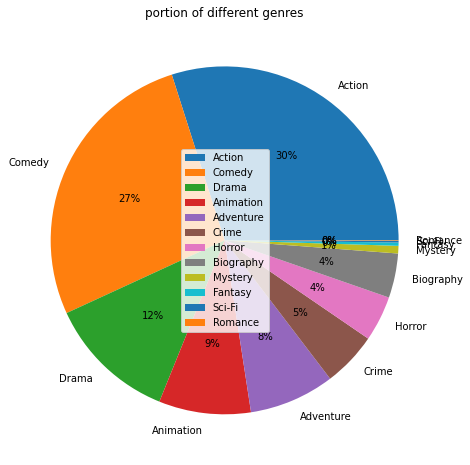

In [13]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
plt.figure(figsize=(50, 8))
labels = g.index
numbe = g.values
plt.pie(numbe,labels = labels,autopct='%1.0f%%')
plt.legend()
plt.legend(loc="center")
plt.title("portion of different genres")
plt.show() 

### As for genre, we can see that Action and Comedy then Drama are the best genre

In [14]:
s = ns_s.size().sort_values(ascending = False)
s.head(3)

star
Tom Hanks            29
Tom Cruise           25
Denzel Washington    24
dtype: int64

### As for star, we can see that Leonardo Tom Hanks, Tom Cruise, Denzel Washington are the most suitable stars

In [15]:
d = ns_d.size().sort_values(ascending = False)
d.head(3)

director
Steven Spielberg    20
Tim Burton          15
Ron Howard          15
dtype: int64

### As for director, we can see that Steven Spielberg, Tim Burton,  Ron Howard are the most suitable directors

In [16]:
w = ns_w.size().sort_values(ascending = False)
w.head(3)

writer
John Hughes           12
Tyler Perry           11
M. Night Shyamalan     9
dtype: int64

### As for writer, we can see that John Hughes, Tyler Perry and M. Night Shyamalan are the most suitable writers

In [17]:
r = ns_r.size().sort_values(ascending = False)
r.head(3)

rating
PG-13    864
R        655
PG       400
dtype: int64

### As for ratings, we can see that PG-13 is way better than others

## 2) Let's turn to another side - gross

In [18]:
# sort dataset by gross
ng_movies = n_movies.sort_values(by = "gross", ascending = False)

In [19]:
ng_movies.head(5)

       genre               star         director           writer rating  score  year        gross
6380  Action       Daisy Ridley      J.J. Abrams  Lawrence Kasdan  PG-13    8.1  2015  936662225.0
5061  Action    Sam Worthington    James Cameron    James Cameron  PG-13    7.8  2009  760507625.0
2420   Drama  Leonardo DiCaprio    James Cameron    James Cameron  PG-13    7.8  1997  658672302.0
6391  Action        Chris Pratt  Colin Trevorrow       Rick Jaffa  PG-13    7.0  2015  652270625.0
5723  Action  Robert Downey Jr.      Joss Whedon      Joss Whedon  PG-13    8.1  2012  623357910.0

We can straightforwardly get that based on the gross, the best choices of genre is : **Action**<br> 
of star are : **Daisy Ridley, Robert Downey Jr., Sam Worthington, Leonardo DiCaprio and Chris Pratt** <br> 
of director are : **J.J. Abrams, James Cameron, Colin Trevorrow and Joss Whedon**<br>
of writer are : **Lawrence Kasdan, James Cameron, Rick Jaffa and Joss Whedon**<br>
of rating are : **PG-13**

## 3) Now we focus on one of top 3 genre - Drama

In [20]:
drama_movies = n_movies[n_movies["genre"]=="Drama"]

In [21]:
drama_movies.head(5)

     genre            star          director             writer rating  score  year        gross
5    Drama   Charlie Sheen      Oliver Stone       Oliver Stone      R    8.1  1986  138530565.0
9    Drama   Jeff Goldblum  David Cronenberg   George Langelaan      R    7.5  1986   40456565.0
34   Drama     Paul Newman   Martin Scorsese       Walter Tevis      R    7.0  1986   52293982.0
222  Drama  Matthew Modine   Stanley Kubrick     Gustav Hasford      R    8.3  1987   46357676.0
223  Drama  Patrick Swayze    Emile Ardolino  Eleanor Bergstein  PG-13    6.9  1987   63952836.0

### Check if those great stars, directors and writers had the experience in drama movies

In [22]:
print("Daisy Ridley" in drama_movies.star.values,"Robert Downey Jr." in drama_movies.star.values,"Sam Worthington" in drama_movies.star.values,"Leonardo DiCaprio" in drama_movies.star.values,"Chris Pratt" in drama_movies.star.values )

False False False True False


In [23]:
print("J.J. Abrams" in drama_movies.director.values,"James Cameron" in drama_movies.director.values,"Colin Trevorrow" in drama_movies.director.values,"Joss Whedon" in drama_movies.director.values)

False True False False


In [24]:
print("Lawrence Kasdan" in drama_movies.writer.values,"James Cameron" in drama_movies.writer.values,"Rick Jaffa" in drama_movies.writer.values,"Joss Whedon" in drama_movies.writer.values)

False True False False


As a conclusion, if we have to create a **drama movie**, we need to hire **Leonardo DiCaprio as a star**, **James Cameron as a director** and **James Cameron as a writer**!

## 4) Comedy movies

In [25]:
comedy_movies = n_movies[n_movies["genre"]=="Comedy"]

In [26]:
comedy_movies.head(5)

     genre                star       director              writer rating  score  year       gross
1   Comedy   Matthew Broderick    John Hughes         John Hughes  PG-13    7.8  1986  70136369.0
8   Comedy      Molly Ringwald  Howard Deutch         John Hughes  PG-13    6.8  1986  40471663.0
17  Comedy        Rick Moranis       Frank Oz       Howard Ashman  PG-13    6.9  1986  38747385.0
21  Comedy  Rodney Dangerfield    Alan Metter  Rodney Dangerfield  PG-13    6.6  1986  91258000.0
25  Comedy         Ally Sheedy    John Badham         S.S. Wilson     PG    6.6  1986  40697761.0

### Check if those great stars, directors and writers had the experience in crime movies

In [27]:
print("Daisy Ridley" in comedy_movies.star.values,"Robert Downey Jr." in comedy_movies.star.values,"Sam Worthington" in comedy_movies.star.values,"Leonardo DiCaprio" in comedy_movies.star.values,"Chris Pratt" in comedy_movies.star.values )

False True False False False


In [28]:
print("J.J. Abrams" in comedy_movies.director.values,"James Cameron" in comedy_movies.director.values,"Colin Trevorrow" in comedy_movies.director.values,"Joss Whedon" in comedy_movies.director.values)

False False False False


In [29]:
print("Lawrence Kasdan" in comedy_movies.writer.values,"James Cameron" in comedy_movies.writer.values,"Rick Jaffa" in comedy_movies.writer.values,"Joss Whedon" in comedy_movies.writer.values)

False False False False


As a conclusion, if we have to create a **comedy movie**, we need to hire **Robert Downey Jr.**, and as for **director and writer**, there is **no guarantee and past experience**

## 5) Action movies

In [30]:
action_movies = n_movies[n_movies["genre"]=="Action"]

In [31]:
action_movies.head(5)

     genre                star            director            writer rating  score  year        gross
2   Action          Tom Cruise          Tony Scott          Jim Cash     PG    6.9  1986  179800601.0
3   Action    Sigourney Weaver       James Cameron     James Cameron      R    8.4  1986   85160248.0
23  Action      Clint Eastwood      Clint Eastwood  James Carabatsos      R    6.8  1986   42724017.0
28  Action        Eddie Murphy     Michael Ritchie    Dennis Feldman  PG-13    5.9  1986   79817937.0
31  Action  Sylvester Stallone  George P. Cosmatos     Paula Gosling      R    5.7  1986   49042224.0

### Check if those great stars, directors and writers had the experience in action movies

In [32]:
print("Daisy Ridley" in action_movies.star.values,"Robert Downey Jr." in action_movies.star.values,"Sam Worthington" in action_movies.star.values,"Leonardo DiCaprio" in action_movies.star.values,"Chris Pratt" in action_movies.star.values )

True True True True True


In [33]:
print("J.J. Abrams" in action_movies.director.values,"James Cameron" in action_movies.director.values,"Colin Trevorrow" in action_movies.director.values,"Joss Whedon" in action_movies.director.values)

True True True True


In [34]:
print("Lawrence Kasdan" in action_movies.writer.values,"James Cameron" in action_movies.writer.values,"Rick Jaffa" in action_movies.writer.values,"Joss Whedon" in action_movies.writer.values)

True True True True


As for **action movies**, we have many choices.<br>
For **actors and stars**, we can hire **Daisy Ridley,Robert Downey Jr., Sam Worthington, Leonardo DiCaprio and Chris Pratt**.<br>
For **director**, we can hire **J.J. Abrams, James Cameron, Colin Trevorrow and Joss Whedon**.<br>
For **writer**, we can hire **Lawrence Kasdan, James Cameron, Rick Jaffa and Joss Whedon**

## Now compare their averages of gross and score

In [38]:
np.mean(drama_movies.gross)

75456962.11297071

In [39]:
np.mean(drama_movies.score)

6.8836820083682015

In [40]:
np.mean(comedy_movies.gross)

74830194.69216418

In [41]:
np.mean(comedy_movies.score)

6.211194029850745

In [42]:
np.mean(action_movies.gross)

111911762.36974789

In [43]:
np.mean(action_movies.score)

6.463361344537814

## In the conclusion, action movies have the largest gross, and nice score.

# 4.Visualization: 

## 1) Let's see the gross of drama movies, crime movies and action movies

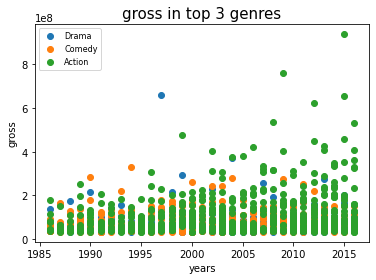

In [50]:
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(drama_movies.year, drama_movies.gross)
plt.scatter(comedy_movies.year, comedy_movies.gross)
plt.scatter(action_movies.year, action_movies.gross)
plt.xlabel("years", fontsize=10)
plt.ylabel("gross", fontsize=10)
plt.title("gross in top 3 genres",fontsize=15)
plt.legend(["Drama","Comedy","Action"],loc = "upper left",fontsize=8)
plt.show()

### Based on this plot, we can guess and assume that Action movies are the most profitable and popular genre in the future and in the recent years

## 2) Let's see the score of drama movies, crime movies and action movies

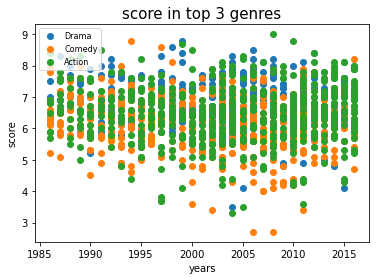

In [51]:
plt.scatter(drama_movies.year, drama_movies.score)
plt.scatter(comedy_movies.year, comedy_movies.score)
plt.scatter(action_movies.year, action_movies.score)
plt.xlabel("years", fontsize=10)
plt.ylabel("score", fontsize=10)
plt.title("score in top 3 genres",fontsize=15)
plt.legend(["Drama","Comedy","Action"],loc = "upper left",fontsize=8)
plt.show()

### Based on this plot, we can guess and assume that Action movies are the most popular movies in the future and in the recent years

## 3) Let take a look at genre portions of all the movies that got score over 8.0

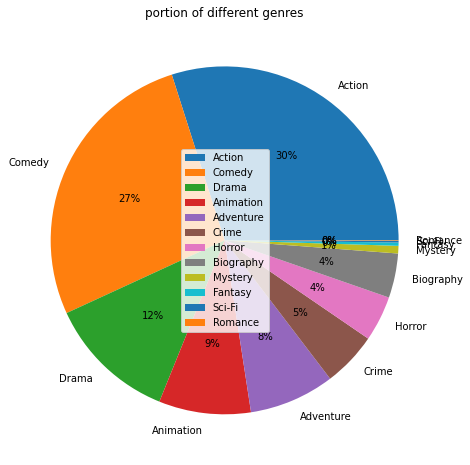

In [52]:
plt.figure(figsize=(50, 8))
labels = g.index
numbe = g.values
plt.pie(numbe,labels = labels,autopct='%1.0f%%')
plt.legend()
plt.legend(loc="center")
plt.title("portion of different genres")
plt.show() 

Look like Action movie is the best choice!

## 4) Let's build a new dataset based on both score >= average and gross >= average, then supervise the portions of different genres

In [53]:
nf_movies = n_movies[n_movies["score"]>= np.mean(n_movies["score"])]

In [54]:
fg = nf_movies.groupby("genre").size()

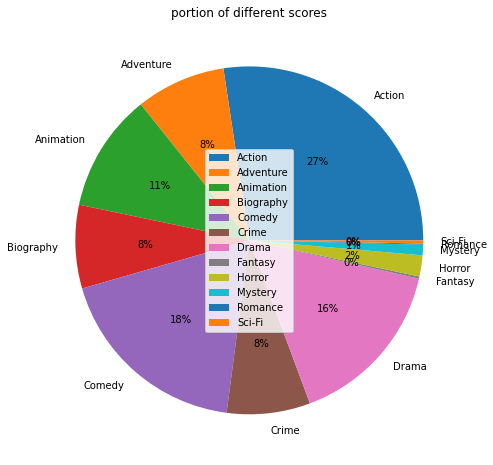

In [55]:
 plt.figure(figsize=(50, 8))
labels = fg.index
numbe = fg.values
plt.pie(numbe,labels=labels,autopct='%1.0f%%')
plt.legend()
plt.legend(loc="center")
plt.title("portion of different scores")
plt.show() 

#### Yes, action movie has the largest average of gross and the largestr average of score

# 5.Summary

From **No.2 section**, we got that Action, Comedy and Drama have the largest potential market demanded!<br>
From **No.3 section**, we got that Action movie is the no.1 priority of producing a new movie, and we also found there has more choices of cast and faculty of action movie.<br>
From **No.4 section**, we prove and confirm that action movie has the largest commercial values and requirements in the future based on both gross and score - best gross and great score.<br>
The best stars, directors and writers are
For **actors and stars**, we can hire **Daisy Ridley,Robert Downey Jr., Sam Worthington, Leonardo DiCaprio and Chris Pratt**.<br>
For **director**, we can hire **J.J. Abrams, James Cameron, Colin Trevorrow and Joss Whedon**.<br>
For **writer**, we can hire **Lawrence Kasdan, James Cameron, Rick Jaffa and Joss Whedon**
These celebrities not only are guarantee to gross, but also have the greatest experience of producing action movies.

# 6.Recommendations:

So, i sincerely recommend that if employers need to produce a new movie for the summer, they should focus on the action movies, and hire some actors and stars like Daisy Ridley,Robert Downey Jr., Sam Worthington, Leonardo DiCaprio and Chris Pratt, hire J.J. Abrams, James Cameron, Colin Trevorrow and Joss Whedon as directors and hire Lawrence Kasdan, James Cameron, Rick Jaffa and Joss Whedon as writers, who has the greatest experience in action movies. And the best rating is PG-13.